# Trabalho CE2 - Eredivisie vs Primeira Liga

Professor Eduardo Monteiro

Matheus Erbisti - 180024990

Ramon Moreira - 180036980

## Introdução

É de amplo conhecimento que as melhores ligas nacionais de futebol da Europa são da Inglaterra (Premier League), Espanha (La Liga), Itália (Serie A), Alemanha (Bundesliga) e França (Ligue One); para efeito demonstrativo, a última conquista da Champions League (torneio continental dos melhores clubes europeus) por um time fora desse top 5 foi em 2003/04.

Nesse contexto, o objetivo desse seminário é descobrir qual seria a 6ª melhor liga da Europa. Devido à história e tradição dos times, escolhemos o campeonato holandês (Eredivisie) e português (Primeira Liga) para concorrer nessa posição.

Ambos os bancos de dados e suas informações foram tirados do site www.football-data.co.uk, referentes à temporada 2018/2019 dos dois campeonatos. Não foram feitas mudanças significativas como limpeza de dados, apenas criações de novas variáveis que serão detalhadas à frente.

### Importação de Pacotes e Dados

Aqui estão todos os pacotes e os bancos de dados utilizados.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

holandes = pd.read_csv("Holandes.csv")
portugues = pd.read_csv("Portugues.csv")

warnings.filterwarnings("ignore")

Os dois bancos de dados tem uma estrutura de 306 linhas por 61 colunas, isso é, 61 variáveis e 306 observações. Contudo, nem todas as variáveis serão utilizadas; segue uma lista e breve explicação das variáveis mais importantes:

* HomeTeam e AwayTeam - Identificação das equipes mandantes e visitantes da partida (Variável qualitativa).

* FTHG e FTAG (Full Time Home/Away Goals) - Total de gols na partida da equipe da casa e dos visitantes (Variável quantitativa discreta).

* FTR (Full Time Result) - Qual time ganhou a partida (Variável qualitativa).

* HS e AS (Home/Away Shots) - Quantidade de chute do time mandante ou visitante na partida (Variável quantitativa discreta).

* HST e AST (Home/Away Shots on Target) - Quantidades de chute do time mandante ou visitante que foram no gol durante a partida (Variável quantitativa discreta).

* HY, HR, AY e AR (Home/Away Yellow/Red Cards) - Número de cartões amarelo ou vermelho que o time mandante ou visitante receberam durante a partida (Variável quantitativa discreta).

* HF e AF (Home/Away Fouls) - Número de faltas cometidas pelo time da casa ou de fora (Variável quantitativa discreta).

* B365H, B365A e B365D - "Odds" fornecido pelo site Bet365 sobre o time vencedor ser o mandante, visitante ou dar empate (Variável quantitativa contínua). 


In [54]:
holandes

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,N1,10/08/2018,Zwolle,Heerenveen,2,3,A,1,3,A,...,2.22,16,-0.25,2.26,2.17,1.84,1.71,2.93,3.58,2.43
1,N1,11/08/2018,Ajax,Heracles,1,1,D,0,0,D,...,3.55,20,-2.50,2.06,1.99,1.91,1.84,1.13,9.75,20.82
2,N1,11/08/2018,Excelsior,For Sittard,1,1,D,1,0,H,...,2.14,19,-0.25,1.88,1.84,2.06,2.00,2.35,3.50,3.11
3,N1,11/08/2018,PSV Eindhoven,Utrecht,4,0,H,1,0,H,...,2.52,20,-1.25,1.96,1.91,1.97,1.93,1.38,5.06,9.24
4,N1,11/08/2018,Willem II,VVV Venlo,0,1,A,0,1,A,...,1.90,20,-0.25,2.07,2.01,1.88,1.83,2.27,3.48,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,N1,15/05/2019,Graafschap,Ajax,1,4,A,1,2,A,...,4.83,19,2.50,2.17,2.08,1.81,1.77,23.85,13.41,1.08
302,N1,15/05/2019,NAC Breda,Zwolle,0,0,D,0,0,D,...,2.43,18,0.00,2.06,2.01,1.88,1.84,2.68,3.76,2.55
303,N1,15/05/2019,PSV Eindhoven,Heracles,3,1,H,1,1,D,...,4.33,20,-2.00,1.86,1.82,2.10,2.04,1.11,11.08,19.90
304,N1,15/05/2019,Utrecht,Heerenveen,3,1,H,1,1,D,...,2.99,22,-1.00,2.04,1.98,1.95,1.87,1.68,4.40,4.69


## Análise Descritiva

### Odds de vitória

Odds são probabilidades dentro de um determinado evento, para análise será utilizado os odds da Bet365.
Quanto mais próximo de 1, mais favorito é o time.

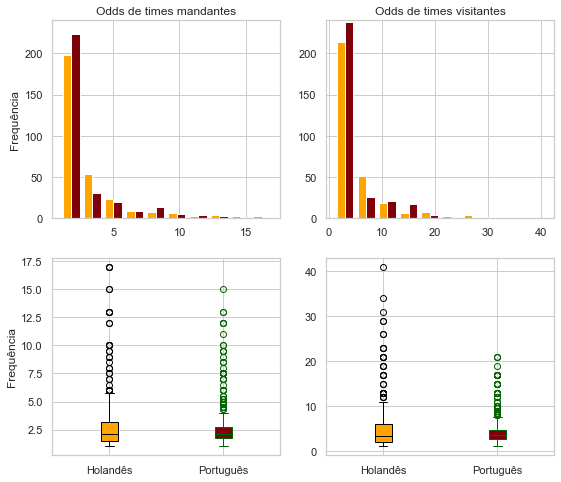

In [35]:
oddH = [holandes.B365H, portugues.B365H]
oddA = [holandes.B365A, portugues.B365A]



fig, ((graf1, graf2), (graf3, graf4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8))

cores = ["orange", "#7E0008"]

graf1.hist(oddH, color = cores)
graf2.hist(oddA, color = cores)


cores = ["orange", "black"]

for i in range(2):
    graf3.boxplot(oddH[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    
    graf4.boxplot(oddA[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    if i == 0:
        cores[1] = "#7E0008"
        cores.append("#006400")


graf1.set_title("Odds de times mandantes")
graf2.set_title("Odds de times visitantes")

graf1.set_ylim(0, 240)
graf2.set_ylim(0, 240)

graf1.set_ylabel("Frequência")
graf3.set_ylabel("Frequência")

graf3.set_xticklabels(['Holandês', 'Português'])
graf4.set_xticklabels(['Holandês', 'Português'])



plt.show()

In [36]:
dados = {'holandes_casa': holandes.B365H, 'portugues_casa': portugues.B365H,
         'holandes_fora': holandes.B365A, 'portugues_fora': portugues.B365A}

odds_v = pd.DataFrame(data = dados)

odds_v.describe()

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,3.100033,2.944542,5.377484,4.923954
std,2.850247,2.363847,5.915622,4.217440
min,1.020000,1.080000,1.080000,1.160000
25%,1.500000,1.762500,2.072500,2.605000
50%,2.100000,2.140000,3.300000,3.600000
75%,3.200000,2.700000,6.000000,4.750000
max,17.000000,15.000000,41.000000,21.000000


(Parte dos mandantes)

Através do histograma vemos que a maior parte dos odds estão próximo de 2(50% de chance de vitória), é de se esperar que a equipe mandante tenha mais chances de vitória. Pelo boxplot é possível notar vários outliers, com odds que passam de 10(10% de chance de vitória), provavelmente são partidas depois da primeira metade do campeonato, onde equipes que estão brigando pelo título enfrentam adversários da parte de baixo da tabela. O valor mínimo mostra uma partida extremamente favorável para a equipe mandante(98% de chance de vitória no holandês e 92,6% no português), já o valor máximo mostra o contrário, uma partida onde a equipe mandante tem a menor probabilidade de vitória(5,9% no holandês e 6,7% no português).

Quando comparamos as duas ligas, é possível notar uma maior variabilidade dos odds no campeonato Holandês. Além disso, nota-se que o valor do primeiro quartil é menor no campeonato holandês do que no português, isso mostra que em 25% dos jogos a equipe mandante teve mais de 66% de chance de vitória no campeonato holandês, contra 57% no português. O valor da mediana está bem próximo, já o terceiro quartil mostra que as equipes mandantes que não são favoritas para vencer o jogo têm mais chances no campeonato português do que no holandês.

(Parte dos visitantes)

Já com as equipes visitantes os valores dos odds estão próximos de 3.5(28.6% de chance de vitória) e a variabilidade no campeonato holandês continua maior. A distribuição é parecida com o das equipes mandantes, porém aqui os odds são maiores, com o primeiro quartil acima de 2 em ambos campeonatos. É interessante notar que a diferença no terceiro quartil aumentou consideravelmente, além disso vemos outliers mais extremos no campeonato holandês.   

### Odds de empate

As odds de empate estão separadas pq bla bla bla

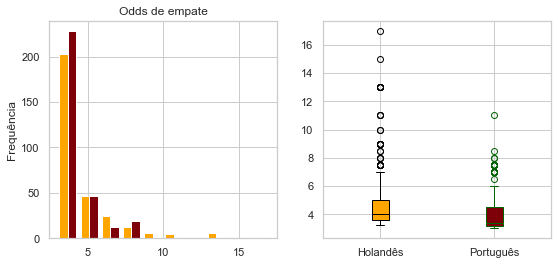

In [47]:
oddD = [holandes.B365D, portugues.B365D]

cores = ["orange", "#7E0008"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

graf1.hist(oddD, color = cores)


cores = ["orange", "black"]
legendas = ["Holandês", "Português"]

for i in range(2):
    graf2.boxplot(oddD[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))

    if i == 0:
        cores[1] = "#7E0008"
        cores.append("#006400")

        
graf1.set_title('Odds de empate')
graf1.set_ylabel("Frequência")

graf2.set_xticklabels(['Holandês', 'Português'])

plt.show()

Com relação ao empate, os odds são mais altos(a chance de ocorrer é menor) e grande parte está em torno de 4(25% de chance de ocorrer empate). Algo que chama a atenção é que a maior probabilidade de ocorrer empate foi de algo em torno de 30% para os dois campeonatos.
Comparando as 2 ligas vemos que as chances de ocorrer empate na liga portuguesa é maior, com uma variabilidade menor. Isto pode ocorrer por conta do ataque, defesa ou nível semelhante das equipes. Uma análise de outras variáveis pode esclarecer este assunto.

### Gols por jogo

Essa variável é possivelmente a mais importante de todo o banco de dados. Afinal, o gol é o ápice do jogo de futebol, e é o que torna o jogo emocionante, seja pela dificuldade, quantidade ou falta dos gols.

Dessa forma, podemos enxergar os dados de gols por jogo da seguinte maneira:

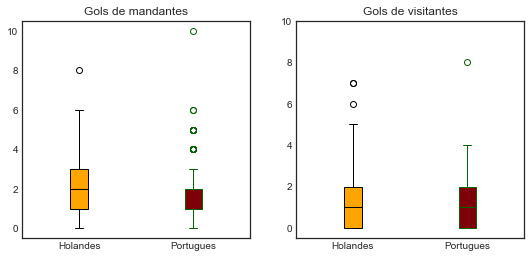

In [93]:
plt.style.use('seaborn-white')

gols_dentro = [holandes.FTHG, portugues.FTHG]
gols_fora = [holandes.FTAG, portugues.FTAG]
cores = ["orange", "black"]
legendas = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

for i in range(2):
    graf1.boxplot(gols_dentro[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    
    graf2.boxplot(gols_fora[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    if i == 0:
        cores[1] = "#7E0008"
        cores.append("#006400")

graf1.set_title('Gols de mandantes')
graf2.set_title('Gols de visitantes')
graf1.set_xticklabels(['Holandes', 'Portugues'])
graf2.set_xticklabels(['Holandes', 'Portugues'])
plt.ylim(-0.5, 10)

plt.show()

In [36]:
gols = {'holandes_casa':holandes.FTHG, 'portugues_casa':portugues.FTHG,
        'holandes_fora':holandes.FTAG, 'portugues_fora':portugues.FTAG}

FTHG = pd.DataFrame(data = gols)

FTHG.describe()

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,2.006536,1.522876,1.460784,1.176471
std,1.584750,1.412288,1.416564,1.168536
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000
max,8.000000,10.000000,7.000000,8.000000


Com esses gráficos e as medidas, podemos perceber diversos pontos:

1 - Em ambos os campeonatos, o time que joga em casa costuma marcar mais gols. Isso é evidenciado pelo 1º quartil que é de 1 gol nos mandantes dos dois campeonatos, e 0 gols para os visitantes.

2 - O campeonato holandês teve média superior de gols tanto para quem joga em casa e quem joga fora, embora o português tenha bem mais valores extremos.

3 - De maneira geral, os times holandeses que jogam em casa fazem mais gols, como evidenciado por todos os quartis e média.

4 - Os desvios padrões são bem próximos uns dos outros, com exceção dos times visitantes de Portugal que tende a ser mais consistente com a média que os demais.

### Chutes na partida

Outra variável importante, pois se não há chutes, não há gols. De maneira simplista, a quantidade de chutes  mede o quão "agitada" e pró-ofensiva a partida foi; então, a tendência é que um jogo seja melhor quanto maior for o número de chutes.

Portanto, vamos observar os dados:

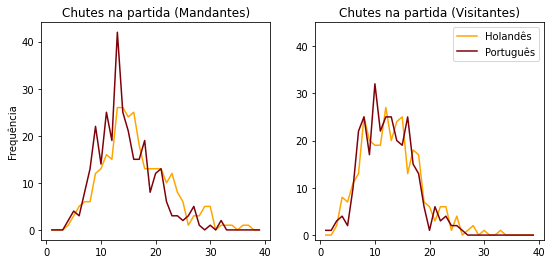

In [4]:
campeonatos = [holandes, portugues]
cores = ["orange", "#7E0008"]
legenda = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

for i in range(len(campeonatos)):
    counts1, bins1 = np.histogram(campeonatos[i].HS, bins = range(0, 40, 1))
    counts2, bins2 = np.histogram(campeonatos[i].AS, bins = range(0, 40, 1))
    
    graf1.plot(bins1[:-1] + 1, counts1, color = cores[i], label = legenda[i])
    graf1.set_ylabel('Frequência')
    graf1.set_title('Chutes na partida (Mandantes)')
    
    graf2.plot(bins2[:-1] + 1, counts2, color = cores[i], label = legenda[i])
    graf2.set_title('Chutes na partida (Visitantes)')
    

plt.ylim(-1, 45)
plt.legend()

plt.show()

In [98]:
cht = {"chutes_mandante_holanda":holandes.HS, "chutes_mandante_portugal":portugues.HS,
         "chutes_visitante_holanda":holandes.AS, "chutes_visitante_portugal":portugues.AS}

chutes = pd.DataFrame(data = cht)

chutes.describe()

,chutes_mandante_holanda,chutes_mandante_portugal,chutes_visitante_holanda,chutes_visitante_portugal
count,306.000000,306.000000,306.000000,306.000000
mean,15.375817,13.437908,12.006536,11.379085
std,6.002126,5.111645,5.226661,4.565022
min,3.000000,3.000000,2.000000,0.000000
25%,11.250000,10.000000,8.000000,8.000000
50%,14.500000,13.000000,12.000000,11.000000
75%,19.000000,17.000000,15.000000,15.000000
max,36.000000,31.000000,32.000000,25.000000


Diversas características dos dados puderam ser levantadas com base nesses recursos:
    
1 - Em ambos os campeonatos, os mandantes tendem a chutarem mais que os visitantes, como evidenciado pela média e os quartis. Entretanto, o desvio padrão também é maior, ou seja, é uma média menos consistente do que dos visitantes.

2 - Os times holandeses costumam ter mais chutes por partida que os portugueses, tendo mais times que chutaram entre 18 a 40 vezes em partidas. Ainda assim, o menor desvio padrão dos clubes da Holanda é dos visitantes, que consegue ser maior do que o desvio padrão dos clubes portugueses que jogam em casa.

3 - O maior valor de chutes numa partida em Portugal é de 31 em um time mandante, que é um valor inferior ao maior número de chutes de um clube visitante holandês com 32.

### Precisão dos chutes na partida

Embora o número de chutes possa refletir bem a qualidade de uma partida, não é exatamente uma regra fixa; pode acontecer uma partida com 4 chutes e 4 gols, bem como uma partida com 30 chutes isolados.

Seguindo essa lógica, os chutes com risco de gol são aqueles que transmitem emoção. Então, criamos uma nova variável "Precisão" para medir quantos chutes são direcionados ao gol em relação ao total. Portanto:

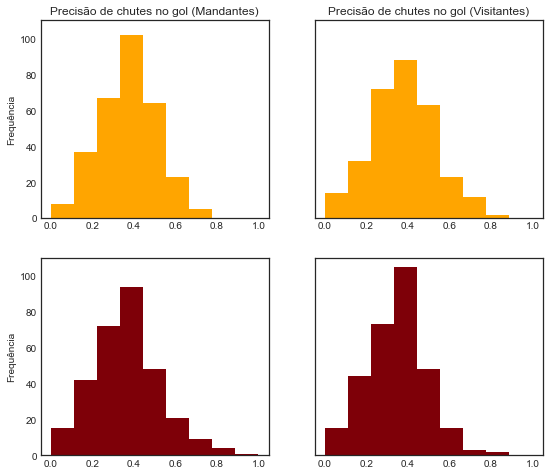

In [94]:
precisao_holandes_casa = []
precisao_portugues_casa = []

precisao_holandes_fora = []
precisao_portugues_fora = []


for i in range(len(holandes)):
    precisao_casa_hd = holandes.HST[i] / holandes.HS[i]
    precisao_casa_pt = portugues.HST[i] / portugues.HS[i]
    
    precisao_fora_hd = holandes.AST[i] / holandes.AS[i]
    precisao_fora_pt = portugues.AST[i] / portugues.AS[i]
    
    
    precisao_holandes_casa.append(precisao_casa_hd)
    precisao_portugues_casa.append(precisao_casa_pt)
    
    precisao_holandes_fora.append(precisao_fora_hd)
    precisao_portugues_fora.append(precisao_fora_pt)

    
    
precisoes_casa = [precisao_holandes_casa, precisao_portugues_casa]
precisoes_fora = [precisao_holandes_fora, precisao_portugues_fora]



fig, grafs = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8), sharey = True)

bins = np.linspace(0, 1, 10)


grafs[0, 0].hist(precisao_holandes_casa, bins, rwidth = 1, color = "orange")
grafs[0, 1].hist(precisao_holandes_fora, bins, rwidth = 1, color = "orange")
grafs[1, 0].hist(precisao_portugues_casa, bins, rwidth = 1, color = "#7E0008")
grafs[1, 1].hist(precisao_portugues_fora, bins, rwidth = 1, color = "#7E0008")

grafs[0, 0].set_title("Precisão de chutes no gol (Mandantes)")
grafs[0, 1].set_title("Precisão de chutes no gol (Visitantes)")

grafs[0, 0].set_ylabel("Frequência")
grafs[1, 0].set_ylabel("Frequência")

plt.show()

In [99]:
pcs = {"precisao_mandante_holanda":precisao_holandes_casa, "precisao_visitante_holanda":precisao_holandes_fora,
       "precisao_mandante_portugal":precisao_portugues_casa, "precisao_visitante_portugal":precisao_portugues_fora}

precisao = pd.DataFrame(data = pcs)

precisao.describe()

,precisao_mandante_holanda,precisao_visitante_holanda,precisao_mandante_portugal,precisao_visitante_portugal
count,306.000000,306.000000,306.000000,305.000000
mean,0.366567,0.368974,0.358170,0.333777
std,0.138417,0.157187,0.162449,0.142256
min,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.264035,0.250000,0.250000
50%,0.363636,0.363636,0.333333,0.333333
75%,0.466667,0.500000,0.453409,0.428571
max,0.714286,0.800000,1.000000,0.833333


Dado a análise exploratória desses dados, vemos que:

1 - A precisão dos times não parece ser muito afetada por jogar dentro ou fora de casa. Isso é evidenciado tanto pela médias, desvios padrões, quantis e gráficos dos mandantes e visitantes da mesma liga.

2 - A distribuição dos dados aparenta não ser muito diferente em ambas as ligas, com todas as médias e medianas sendo bem próximas entre si, entre 33 a 37% de precisão. 

### Resultado da partida

Uma maneira comum de medir o quão boa foi uma partida, é pela previsibilidade do seu resultado; afinal, se existe alguma tendência forte para algum lado ganhar, o jogo tende a ser menos emocionante.

Pensando assim, montamos os seguintes gráficos para verificar as porcentagens de vitória para mandantes, visitantes ou empates:

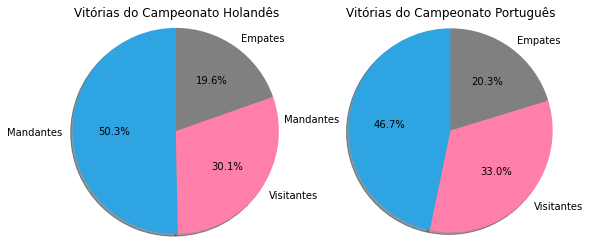

In [77]:
resultados_holandes = [sum(holandes.FTR == "H"), sum(holandes.FTR == "A"), sum(holandes.FTR == "D")]
resultados_portugues = [sum(portugues.FTR == "H"), sum(portugues.FTR == "A"), sum(portugues.FTR == "D")]
legenda = ["Mandantes", "Visitantes", "Empates"]
cores = ["#2FA4E2", "#FF7FAB", "gray"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

graf1.pie(resultados_holandes, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)
graf2.pie(resultados_portugues, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)

graf1.axis('equal')
graf2.axis('equal')

graf1.set_title("Vitórias do Campeonato Holandês")
graf2.set_title("Vitórias do Campeonato Português")


plt.show()

Com os gráficos acima, vemos que ambos os campeonatos tem estruturas bem parecidas, em que o time que joga em casa é quem tem maiores chances de ganhar, seguido pela vitória dos visitantes e por fim os empates.

Contudo, o mais interessante seria que o campeonato fosse equiprovável para qualquer resultado, pois tornaria o campeonato mais imprevisível e emocionante. Nesse sentido, a Primeira Liga é quem parece mais balanceado, pois é menos orientado pra vitória dos times da casa do que a Eredivisie.

### Empates com gols

O resultado final de uma partida deveria refletir o quão agitada e emocionante ela foi; contudo, nem sempre o futebol não segue essas regras. 

De maneira geral, há uma grande diferença entre um jogo terminar 0 a 0 e terminar num 3 a 3, ainda que ambos sejam empates e que  existam defensores de "um bom 0 a 0". 

Nesse raciocínio, criamos essa nova variável que mostra quantos empates que foram marcados pelo menos 1 gol para cada lado, e quantos acabaram sem gols. Sendo assim:

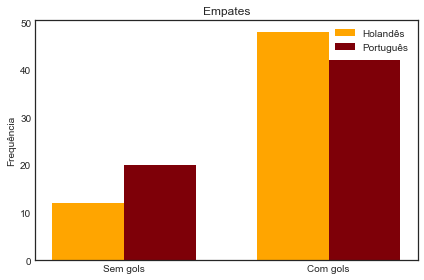

In [155]:
empates_hd = holandes[holandes.FTHG == holandes.FTAG]
empates_pt = portugues[portugues.FTHG == portugues.FTAG]

empates_hd.reset_index(inplace = True, drop = True)
empates_pt.reset_index(inplace = True, drop = True)

com_gols_hd = 0
com_gols_pt = 0


for jogo in range(len(empates_hd)):
    if empates_hd.FTHG[jogo] != 0:
        com_gols_hd += 1



for jogo in range(len(empates_pt)):
    if empates_pt.FTHG[jogo] != 0:
        com_gols_pt += 1

legenda = ['Sem gols', 'Com gols']
hd = [len(empates_hd) - com_gols_hd, com_gols_hd]
pt = [len(empates_pt) - com_gols_pt, com_gols_pt]

x = np.arange(len(legenda))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hd, width, label = 'Holandês', color = "orange")
rects2 = ax.bar(x + width/2, pt, width, label = 'Português', color = "#7E0008")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequência')
ax.set_title('Empates')
ax.set_xticks(x)
ax.set_xticklabels(legenda)
ax.legend()

fig.tight_layout()

plt.show()

In [160]:
empt = {'holandes_empates':empates_hd.FTHG, 'portugues_empates':empates_pt.FTHG}

empates = pd.DataFrame(data = empt)

empates.describe()

,holandes_empates,portugues_empates
count,60.000000,62.000000
mean,1.266667,1.032258
std,0.989207,0.974557
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.750000
max,4.000000,4.000000


Podemos perceber as seguintes curiosidades:

1 - O número total de empates em ambas as ligas foi bem próximo, bem como o desvio padrão e o empate com maior número de gols.

2 - Como demonstrado pelo gráfico, média e 1º quartil, o campeonato holandês tem proporcionalmente bem mais empates com gols do que os times portugueses. Esse é um indício de que a Eredivisie seja mais competitiva e emocionante que a Primeira Liga.

### Faltas na partida

Faltas são muito comuns em partidas de futebol, seja por um estilo de jogo, marcação individual, árbitro pouco leniente ou até mesmo simulações. No entanto, um excesso de faltas marcadas pode tornar o jogo "arrastado", lento e chato; o que redireciona a emoção da partida para brigas e atendimento médico.

Pensando assim, vamos olhar a distribuição de faltas dos campeonatos:

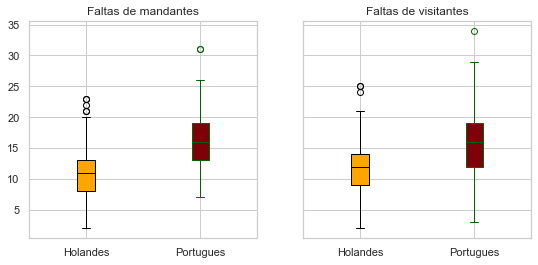

In [55]:
faltas_dentro = [holandes.HF, portugues.HF]
faltas_fora = [holandes.AF, portugues.AF]
cores = ["orange", "black"]
legendas = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4), sharey = True)

for i in range(2):
    graf1.boxplot(faltas_dentro[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    
    graf2.boxplot(faltas_fora[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    if i == 0:
        cores[1] = "#7E0008"
        cores.append("#006400")

graf1.set_title('Faltas de mandantes')
graf2.set_title('Faltas de visitantes')
graf1.set_xticklabels(['Holandes', 'Portugues'])
graf2.set_xticklabels(['Holandes', 'Portugues'])


plt.show()

In [56]:
flt = {'holandes_casa':holandes.HF, 'portugues_casa':portugues.HF,
        'holandes_fora':holandes.AF, 'portugues_fora':portugues.AF}

faltas = pd.DataFrame(data = flt)

faltas.describe()

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,10.888889,16.477124,11.751634,15.960784
std,3.551136,4.430276,3.660657,4.794645
min,2.000000,7.000000,2.000000,3.000000
25%,8.000000,13.000000,9.000000,12.000000
50%,11.000000,16.000000,12.000000,16.000000
75%,13.000000,19.000000,14.000000,19.000000
max,23.000000,31.000000,25.000000,34.000000


Com os recursos utilizados, vemos que:

1 - Os times portugueses são mais propícios a cometer faltas do que os holandeses, o que configura como um ponto positivo para a Eredivisie.

2 - Jogar dentro ou fora de casa não aparenta impactar muito nas faltas, já que os valores de média e quartis tendem a ficar relativamente próximos.

### Cartões amarelos e vermelhos

bla bla bla

In [48]:
dados1 = {"Eredivisie": [sum(holandes.HY), sum(holandes.AY), sum(holandes.HR), sum(holandes.AR)],
          "Primeira Liga": [sum(portugues.HY), sum(portugues.AY), sum(portugues.HR), sum(portugues.AR)]}

df = pd.DataFrame(dados1,
                  index =['Cartões amarelos Mandantes','Cartões amarelos Visitantes',
                          'Cartões vermelhos Mandantes','Cartões vermelhos visitantes'],)  
df

,Eredivisie,Primeira Liga
Cartões amarelos Mandantes,415,690
Cartões amarelos Visitantes,510,804
Cartões vermelhos Mandantes,27,46
Cartões vermelhos visitantes,40,52


Em todos os quesitos a Primeira liga teve valores maiores que a Eredivisie, isso pode indicar que o campeonato português tenha jogos mais físicos ou a tolerância dos arbitros em relação à faltas seja menor em Portugal.

## Testes de hipóteses

bla bla bla

## Análise de Cluster

bla bla bla

## Conclusão

bla bla bla

## Referências

bla bla bla